# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as st
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
import seaborn as sns
sns.set_style('darkgrid')

In [155]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [38]:
medical.shape

(1338, 8)

In [39]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

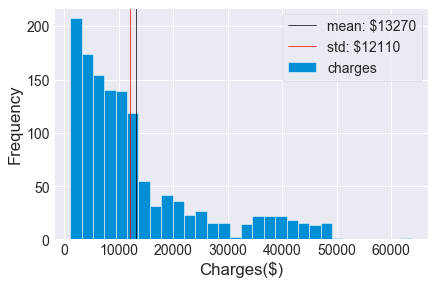

In [182]:
#plt.figure(dpi=100)
medical['charges'].plot.hist(bins=30)
plt.xlabel('Charges($)')
plt.axvline(medical['charges'].mean(), c='k',label='mean: $13270',linewidth=0.7)
plt.axvline(medical['charges'].std(ddof=1), c='red',label='std: $12110',linewidth=0.7)
plt.legend()
plt.show()

In [64]:
print('mean:',medical['charges'].mean())
print('sigma:',medical['charges'].std(ddof=1))

# The mean and std are derived from a sample not a population,
# so there is high degree of uncertainity about how representative of
# the population these obserbations are.

# The mean and the standard deviation are really close to one another
# this may suggest that the dataset follows exponential distribution.

mean: 13270.422265141257
sigma: 12110.011236693994


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The most appropriate test in this case it a one tailed population mean hypothesis test.
As for the appropriatness, according to the CLT, the means of randomly drawn samples are normally distributed. We can use this property to asses how rare the assumed value of 12000 and the observed mean of 13270 really are. The justification for relying on CLT is a big sample size of 1338 observations.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

In [50]:
# The null hypothesis: The actual population mean is $12000.
# The alternative hypothesis: The actual population mean is greater than $12000.

In [185]:
# Critical value for one sided mean test

cv_left_tail = st.norm.ppf(.05)
cv = st.norm.ppf(.95)

In [76]:
# 95% confidence interval for the mean value of $13270
upper_bound = medical['charges'].mean()+cv*medical['charges'].std(ddof=1)/np.sqrt(len(medical))
lower_bound = medical['charges'].mean()-cv*medical['charges'].std(ddof=1)/np.sqrt(len(medical))

lower_bound,upper_bound

(12725.864762144516, 13814.979768137997)

In [ ]:
# As the confidence interval indicates the manager should not be concerned that the actual 
# population mean is below $12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

The null hypothesis: The means of two samples are the equal.\
The alternative hypothesis: The means of two samples are different.
 
The assumption made is that the variances of two populations are equal. 

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [94]:
proportion = medical.insuranceclaim.value_counts(normalize=True)
proportion.index = ['insurance','no_insurance']
proportion

insurance       0.585202
no_insurance    0.414798
Name: insuranceclaim, dtype: float64

In [151]:
insurance = np.array(medical[medical.insuranceclaim==1]['charges'])
no_insurance = np.array(medical[medical.insuranceclaim==0]['charges'])

insurance_mean = np.mean(insurance)
no_insurance_mean = np.mean(no_insurance)
no_insurance_mean

8821.421892306305

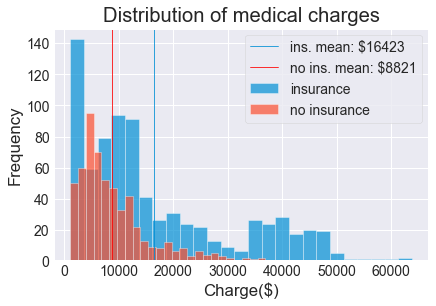

In [154]:
plt.hist(insurance,bins=25, label='insurance',alpha=0.7)
plt.hist(no_insurance,bins=25, label='no insurance',alpha=0.7)

plt.axvline(insurance_mean,label='ins. mean: $16423',linewidth=0.8)
plt.axvline(no_insurance_mean,label='no ins. mean: $8821',linewidth=0.8,c='red')

plt.title('Distribution of medical charges')
plt.ylabel('Frequency')
plt.xlabel('Charge($)')
plt.legend()
plt.show()

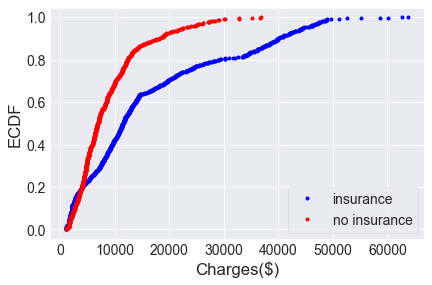

In [187]:
x_ins, y_ins = ecdf(insurance)
x_noins, y_noins = ecdf(no_insurance)
plt.plot(x_ins, y_ins, linestyle='none',marker='.',c='blue',label='insurance')
plt.plot(x_noins, y_noins, linestyle='none',marker='.',c='red',label='no insurance')


plt.ylabel('ECDF')
plt.xlabel('Charges($)')
plt.legend()
plt.show()

In [123]:
# Pooled standard deviation 

n_one = len(insurance)
n_two = len(no_insurance)

sd_one = np.std(insurance)**2
sd_two = np.std(no_insurance)**2

numerator = (n_one-1)*sd_one + (n_two-1)*sd_two
denominator = n_one+n_two-2

pooled_std = np.sqrt(numerator/denominator)

In [128]:
# t-test (manual)
t_numerator = insurance_mean - no_insurance_mean
t_denominator = pooled_std*np.sqrt(1/n_one + 1/n_two)

t_test = t_numerator/t_denominator

t_test

11.901306943555388

In [180]:
# p-value (manual)
p_value  = 1 - st.t.cdf(t_test,len(medical)-1)
p_value_survival_function = st.t.sf(t_test,len(medical)-1)*2

p_value,p_value_survival_function

(0.0, 4.080380148722078e-31)

In [129]:
# t-test (scipy)
st.ttest_ind(insurance,no_insurance,equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [181]:
st.ttest_ind(insurance,no_insurance,equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test